In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

In [3]:
range_n_clusters = [2,3,4,5,6]

NameError: name 'silouette_score' is not defined

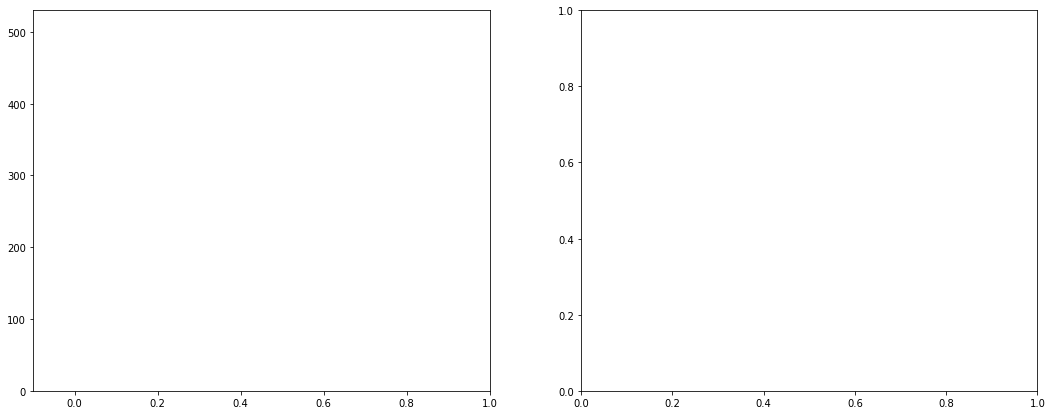

In [4]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    
    ax1.set_ylim([0, len(X) + (n_clusters+1) * 10])
    
    clusterer = KMeans(n_clusters = n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette score is:", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels ==i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower+0.5* size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
    ax1.set_title('The silhouette plot for the various clusters.')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster label')
    
